In [ ]:
#Description : this is a sentiment analaysis program that parses the tweets fetched from Twitter using Python 

In [ ]:
# Import the libraries 
import tweepy 
from textblob import TextBlob 
from wordcloud import WordCloud
import pandas as pd 
import numpy as np 
import re
import matplotlib.pyplot as plt 
import datetime as dt
plt.style.use('fivethirtyeight')

In [109]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [123]:
#keys = "/content/drive/MyDrive/Colab Notebooks/keys.ipynb"

In [127]:
import tweepy

consumerKey = [0]
consumerSecret = [1]
accessToken = [2]
accessSecret = [3]

# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessSecret)
# Creation of the actual interface, using authentication
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
# collect tweets on     #MRT
#for tweet in tweepy.Cursor(api.search,q="MRT",count=100,
 #                      lang="en",rpp=100).items():
 #   print (tweet.created_at, tweet.text)

In [128]:
#Create the authenticiation object 
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret 
authenticate.set_access_token(accessToken, accessSecret)

#Create the API object while passing in the auth information 
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [129]:
#Extract 100 tweets from the twitter user 
posts_1 = api.user_timeline(screen_name = "AdamMGrant", count = 10, lang = "en", tweet_mode = "extended")# 

print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts_1[0:10]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1) “Sorry for the slow reply” is a symptom of unrealistic demands in an always-on culture.

If you didn’t commit to a response deadline, stop apologizing and drop the guilt—you’re not late.

A healthier message is gratitude for reasonable expectations: “Thanks for your patience.”

2) Perfection isn’t just impossible. It’s a counterproductive goal.

Perfectionists are more likely to burn out and less likely to embrace new challenges.

Success depends on high standards, not being flawless. The target is not perfection—it's excellence.

https://t.co/OgW1WT82mp https://t.co/PURNkBxOdF

3) If you're surprised by the feedback you get at a performance review, your boss has failed.

Good managers don't wait for formal meetings to help you grow. They make it a daily priority.

The sooner you get feedback, the sooner you can break bad habits and learn better ones.

4) The arrival fallacy is the illusion that joy lies at a destination ahead.

Achieving a goal is not li

In [130]:
posts_2 = api.user_timeline(screen_name = "BreneBrown", count = 10, lang = "en", tweet_mode = "extended")# 

print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts_2[0:10]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1) “I am cringe, but I am free.”

This is the most awkward, brave, and kind conversation with Pixar filmmaker and badass creator Domee Shi. https://t.co/EvSygmJnNG https://t.co/wHChmxcW1B

2) In this episode of “Dare to Lead,” Kam Franklin and I talk about what it means to lead a creative team.

She explains the daily conflict that bubbles up in the creative process and how normalizing that conflict helps get to the creative magic. @thesuffers https://t.co/s9zSFYkGJG https://t.co/Ia3GaRlmF1

3) So grateful to @TaranaBurke for calling me and saying, "Hey, I have an idea." And, equally grateful for the writers who shared their hearts, their stories, and their truths with the world. Happy 1 year anniversary to "You Are Your Best Thing!" https://t.co/4HxQ7KTEMk

4) Anyone who knows me or my work knows the immeasurable influence @RichardRohrOFM has had on my life. This truly unforgettable two-part conversation left me filled to the brim with love and connection. 

In [131]:
#Create a dataframe with a column called Tweets 
df_1 = pd.DataFrame([tweet.full_text for tweet in posts_1], columns = ['Tweets'])

#Show the first 5 rows of data 
df_1.head(10)

,Tweets
0,“Sorry for the slow reply” is a symptom of unr...
1,Perfection isn’t just impossible. It’s a count...
2,If you're surprised by the feedback you get at...
3,The arrival fallacy is the illusion that joy l...
4,Authenticity is being who you are. You aim to ...
5,"More than burnout and pay, the Great Resignati..."
6,Acts of kindness shouldn't be described as ran...
7,We often underestimate introverts because they...
8,Free speech shouldn't be a license to troll.\n...
9,It's official: @elonmusk is buying @Twitter.\n...


In [132]:
#Create a dataframe with a column called Tweets 
df_2 = pd.DataFrame([tweet.full_text for tweet in posts_2], columns = ['Tweets'])

#Show the first 5 rows of data 
df_2.head(10)

,Tweets
0,"“I am cringe, but I am free.”\n\nThis is the m..."
1,"In this episode of “Dare to Lead,” Kam Frankli..."
2,So grateful to @TaranaBurke for calling me and...
3,Anyone who knows me or my work knows the immea...
4,Protect the flame! #AtlasoftheHeart @hbomax ht...
5,This was such a critically important podcast c...
6,History. Herstory. https://t.co/ValNkCgyT7
7,I love this line from @EmmanuelAcho’s new book...
8,It’s here. 5 episodes. 30 emotions. 1 kick-ass...
9,"Oh, the power in knowing that pain and sorrow ..."


In [133]:
#Clean the text 

#Create a function to clean the tweets 
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @mentions 
  text = re.sub(r'#', '', text) # Removing the '#' symbol 
  text = re.sub(r'RT[\s]+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link 

  return text 

#Cleaning the text 
df_1['Tweets'] = df_1['Tweets'].apply(cleanTxt)

#Show the cleaned text

df_1

,Tweets
0,“Sorry for the slow reply” is a symptom of unr...
1,Perfection isn’t just impossible. It’s a count...
2,If you're surprised by the feedback you get at...
3,The arrival fallacy is the illusion that joy l...
4,Authenticity is being who you are. You aim to ...
5,"More than burnout and pay, the Great Resignati..."
6,Acts of kindness shouldn't be described as ran...
7,We often underestimate introverts because they...
8,Free speech shouldn't be a license to troll.\n...
9,It's official: is buying .\n\nSerious questio...


In [135]:
#Clean the text 

#Create a function to clean the tweets 
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @mentions 
  text = re.sub(r'#', '', text) # Removing the '#' symbol 
  text = re.sub(r'RT[\s]+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link 

  return text 

#Cleaning the text 
df_2['Tweets'] = df_2['Tweets'].apply(cleanTxt)

#Show the cleaned text

df_2

,Tweets
0,"“I am cringe, but I am free.”\n\nThis is the m..."
1,"In this episode of “Dare to Lead,” Kam Frankli..."
2,"So grateful to for calling me and saying, ""He..."
3,Anyone who knows me or my work knows the immea...
4,Protect the flame! AtlasoftheHeart
5,This was such a critically important podcast c...
6,History. Herstory.
7,I love this line from ’s new book. All of us a...
8,It’s here. 5 episodes. 30 emotions. 1 kick-ass...
9,"Oh, the power in knowing that pain and sorrow ..."


In [136]:
# Create a function to get the subjectivity 
def getSubjectivity(text): 
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

  #Create two new columns
df_1['Subjectivity'] = df_1['Tweets'].apply(getSubjectivity)
df_1['Polarity'] = df_1['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns

df_1

,Tweets,Subjectivity,Polarity
0,“Sorry for the slow reply” is a symptom of unr...,0.633333,-0.125000
1,Perfection isn’t just impossible. It’s a count...,0.617912,0.140337
2,If you're surprised by the feedback you get at...,0.494444,0.016667
3,The arrival fallacy is the illusion that joy l...,0.475000,0.775000
4,Authenticity is being who you are. You aim to ...,0.850000,0.450000
5,"More than burnout and pay, the Great Resignati...",0.579167,0.166667
6,Acts of kindness shouldn't be described as ran...,0.558333,-0.041667
7,We often underestimate introverts because they...,0.355556,0.277778
8,Free speech shouldn't be a license to troll.\n...,0.766667,0.300000
9,It's official: is buying .\n\nSerious questio...,0.448333,0.013333


In [137]:
# Create a function to get the subjectivity 
def getSubjectivity(text): 
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

  #Create two new columns
df_2['Subjectivity'] = df_2['Tweets'].apply(getSubjectivity)
df_2['Polarity'] = df_2['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns

df_2

,Tweets,Subjectivity,Polarity
0,"“I am cringe, but I am free.”\n\nThis is the m...",0.840000,0.340000
1,"In this episode of “Dare to Lead,” Kam Frankli...",0.800000,0.400000
2,"So grateful to for calling me and saying, ""He...",0.516667,0.600000
3,Anyone who knows me or my work knows the immea...,0.625000,0.425000
4,Protect the flame! AtlasoftheHeart,0.000000,0.000000
5,This was such a critically important podcast c...,0.750000,0.200000
6,History. Herstory.,0.000000,0.000000
7,I love this line from ’s new book. All of us a...,0.520657,0.176197
8,It’s here. 5 episodes. 30 emotions. 1 kick-ass...,0.550000,0.325000
9,"Oh, the power in knowing that pain and sorrow ...",1.000000,0.000000


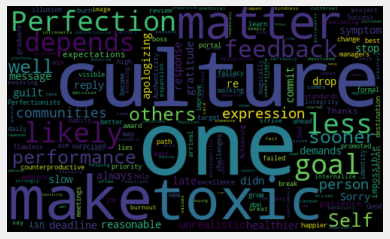

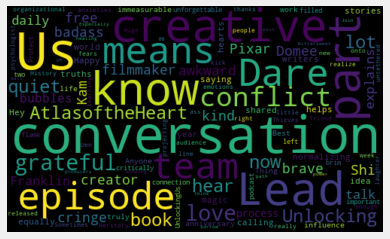

In [143]:
# Plot Word Cloud
allWords = ' '.join([twts for twts in df_1['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119). generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


# Plot Word Cloud
allWords = ' '.join([twts for twts in df_2['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119). generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


In [144]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score): 
  if score < 0: 
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else: 
    return 'Positive'

df_1['Analysis'] = df_1['Polarity'].apply(getAnalysis)

#Show the dataframe 
df_1

,Tweets,Subjectivity,Polarity,Analysis
0,“Sorry for the slow reply” is a symptom of unr...,0.633333,-0.125000,Negative
1,Perfection isn’t just impossible. It’s a count...,0.617912,0.140337,Positive
2,If you're surprised by the feedback you get at...,0.494444,0.016667,Positive
3,The arrival fallacy is the illusion that joy l...,0.475000,0.775000,Positive
4,Authenticity is being who you are. You aim to ...,0.850000,0.450000,Positive
5,"More than burnout and pay, the Great Resignati...",0.579167,0.166667,Positive
6,Acts of kindness shouldn't be described as ran...,0.558333,-0.041667,Negative
7,We often underestimate introverts because they...,0.355556,0.277778,Positive
8,Free speech shouldn't be a license to troll.\n...,0.766667,0.300000,Positive
9,It's official: is buying .\n\nSerious questio...,0.448333,0.013333,Positive


In [145]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score): 
  if score < 0: 
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else: 
    return 'Positive'

df_2['Analysis'] = df_2['Polarity'].apply(getAnalysis)

#Show the dataframe 
df_2

,Tweets,Subjectivity,Polarity,Analysis
0,"“I am cringe, but I am free.”\n\nThis is the m...",0.840000,0.340000,Positive
1,"In this episode of “Dare to Lead,” Kam Frankli...",0.800000,0.400000,Positive
2,"So grateful to for calling me and saying, ""He...",0.516667,0.600000,Positive
3,Anyone who knows me or my work knows the immea...,0.625000,0.425000,Positive
4,Protect the flame! AtlasoftheHeart,0.000000,0.000000,Neutral
5,This was such a critically important podcast c...,0.750000,0.200000,Positive
6,History. Herstory.,0.000000,0.000000,Neutral
7,I love this line from ’s new book. All of us a...,0.520657,0.176197,Positive
8,It’s here. 5 episodes. 30 emotions. 1 kick-ass...,0.550000,0.325000,Positive
9,"Oh, the power in knowing that pain and sorrow ...",1.000000,0.000000,Neutral


In [146]:
# Print all of the positive tweets 
j = 1
sortedDF_1 = df_1.sort_values(by=['Polarity'])
for i in range(0, sortedDF_1.shape[0]): 
  if(sortedDF_1['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' +sortedDF_1['Tweets'][i])
    print()
    j = j+1

1) Perfection isn’t just impossible. It’s a counterproductive goal.

Perfectionists are more likely to burn out and less likely to embrace new challenges.

Success depends on high standards, not being flawless. The target is not perfection—it's excellence.

 

2) If you're surprised by the feedback you get at a performance review, your boss has failed.

Good managers don't wait for formal meetings to help you grow. They make it a daily priority.

The sooner you get feedback, the sooner you can break bad habits and learn better ones.

3) The arrival fallacy is the illusion that joy lies at a destination ahead.

Achieving a goal is not like walking through a portal. You don’t magically become happier when you graduate, get promoted, or win an award.

The best way to improve your well-being is to change your path. 

4) Authenticity is being who you are. You aim to make your identity visible to others.

Integrity is becoming who you say you are. You strive to internalize the image you proj

In [147]:
# Print all of the positive tweets 
j = 1
sortedDF_2 = df_2.sort_values(by=['Polarity'])
for i in range(0, sortedDF_1.shape[0]): 
  if(sortedDF_2['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' +sortedDF_2['Tweets'][i])
    print()
    j = j+1

1) “I am cringe, but I am free.”

This is the most awkward, brave, and kind conversation with Pixar filmmaker and badass creator Domee Shi.  

2) In this episode of “Dare to Lead,” Kam Franklin and I talk about what it means to lead a creative team.

She explains the daily conflict that bubbles up in the creative process and how normalizing that conflict helps get to the creative magic.   

3) So grateful to  for calling me and saying, "Hey, I have an idea." And, equally grateful for the writers who shared their hearts, their stories, and their truths with the world. Happy 1 year anniversary to "You Are Your Best Thing!" 

4) Anyone who knows me or my work knows the immeasurable influence  has had on my life. This truly unforgettable two-part conversation left me filled to the brim with love and connection. UnlockingUs  

5) This was such a critically important podcast conversation with organizational psychologist and friend  that we released it on both “Dare to Lead” and “Unlocking Us

In [148]:
# Print the negative tweets (user one)
j = 1
sortedDF_1 = df_1.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF_1.shape[0]): 
  if(sortedDF_1['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' +sortedDF_1['Tweets'][i])
    print()
    j = j+1

1) “Sorry for the slow reply” is a symptom of unrealistic demands in an always-on culture.

If you didn’t commit to a response deadline, stop apologizing and drop the guilt—you’re not late.

A healthier message is gratitude for reasonable expectations: “Thanks for your patience.”

2) Acts of kindness shouldn't be described as random. They aren't arbitrary or unintentional. They stem from deeply held values or strongly felt emotions.

Helping is an expression of care. It's a decision that someone's well-being matters to you—and an effort to matter to them.



In [156]:
# Print the negative tweets (user two)
j = 1
sortedDF_2 = df_2.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF_2.shape[0]): 
  if(sortedDF_2['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' +sortedDF_2['Tweets'][i])
    print()
    j = j+1
  else: 
    print("No negative Tweets")

No negative Tweets
No negative Tweets
No negative Tweets
No negative Tweets
No negative Tweets
No negative Tweets
No negative Tweets
No negative Tweets
No negative Tweets
No negative Tweets


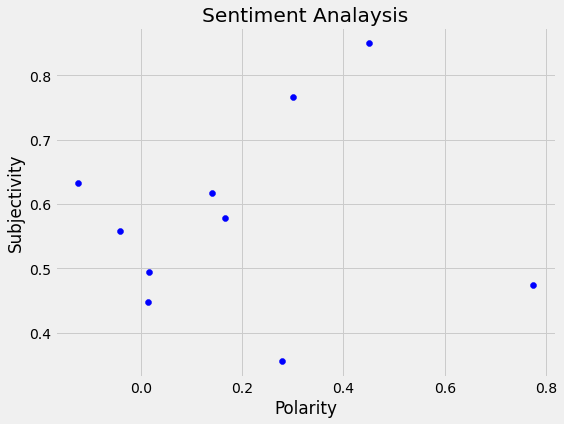

In [158]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
for i in range(0, df_1.shape[0]):
  plt.scatter(df_1['Polarity'][i], df_1['Subjectivity'][i], color='Blue')


plt.title('Sentiment Analaysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

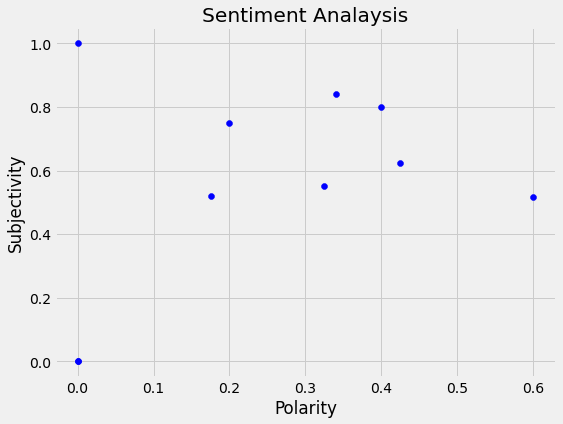

In [159]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
for i in range(0, df_2.shape[0]):
  plt.scatter(df_2['Polarity'][i], df_2['Subjectivity'][i], color='Blue')


plt.title('Sentiment Analaysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [160]:
# Get the percentage of positive tweets 

ptweets = df_1[df_1.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df_1.shape[0])*100, 1)

80.0

In [161]:
# Get the percentage of positive tweets 

ptweets = df_2[df_2.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df_2.shape[0])*100, 1)

70.0

In [162]:
# Get the percentage of negative tweets 
ntweets = df_1[df_1.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df_1.shape[0]*100), 1)

20.0

In [163]:
# Get the percentage of negative tweets 
ntweets = df_2[df_2.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df_2.shape[0]*100), 1)

0.0

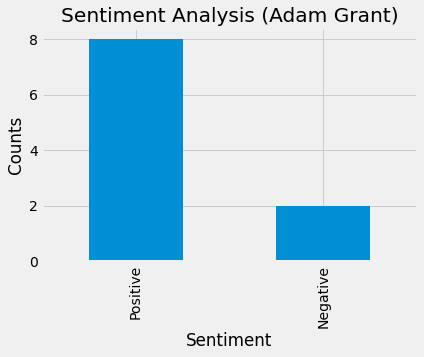

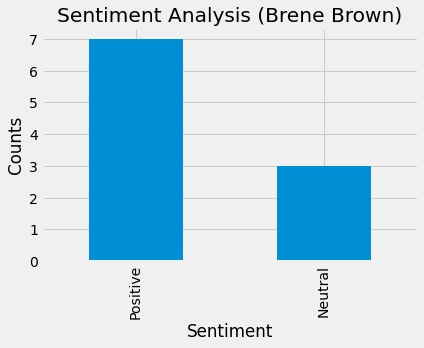

In [167]:
# Show the value counts (user 1)

df_1['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis (Adam Grant)')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_1['Analysis'].value_counts().plot(kind='bar')
plt.show()


# Show the value counts (user two)

df_2['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis (Brene Brown)')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_2['Analysis'].value_counts().plot(kind='bar')
plt.show()